Task 1.1

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_csv("iris_data.csv", sep=';')
labels = pd.read_csv("iris_labels.csv", sep=';')

print (data.shape)
print (labels.shape)

print (data.head())
print (labels.head())

print(data.dtypes)
print(labels.dtypes)

print(data.info())
print(labels.info())

print(data['id'].dtype)
print(labels['id'].dtype)



Saving iris_data.csv to iris_data.csv
Saving iris_labels.csv to iris_labels.csv
(6500, 5)
(6500, 3)
    pl   pw   sl   sw  id
0  5.0  3.5  1.3  0.3   1
1  4.8  3.0  1.4  0.2   2
2  4.7  3.2  1.3  0.2   3
3  4.6  3.2  1.5  0.2   4
4  4.9  3.4  1.3  0.2   5
  examiner  id      species
0   Sobhan   1  Iris-setosa
1   Andrej   2  Iris-setosa
2    Ahmad   3  Iris-setosa
3   Matteo   4  Iris-setosa
4   Sobhan   5  Iris-setosa
pl    float64
pw    float64
sl    float64
sw    float64
id      int64
dtype: object
examiner    object
id           int64
species     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pl      6500 non-null   float64
 1   pw      6500 non-null   float64
 2   sl      6500 non-null   float64
 3   sw      6500 non-null   float64
 4   id      6500 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 254.0 KB
None

In [ ]:
avg_sl = data['sl'].mean()
std_sl = data['sl'].std()

print("Average sepal length (sl):", avg_sl)
print("Standard deviation of sepal length (sl):", std_sl)

Average sepal length (sl): -5.705507692307693
Standard deviation of sepal length (sl): 303.78894834507685


Task 1.2

In [ ]:
data = pd. merge(data, labels, on='id', how='inner')
data.head()

,pl,pw,sl,sw,id,examiner,species
0,5.0,3.5,1.3,0.3,1,Sobhan,Iris-setosa
1,4.8,3.0,1.4,0.2,2,Andrej,Iris-setosa
2,4.7,3.2,1.3,0.2,3,Ahmad,Iris-setosa
3,4.6,3.2,1.5,0.2,4,Matteo,Iris-setosa
4,4.9,3.4,1.3,0.2,5,Sobhan,Iris-setosa


Task 1.3

In [ ]:
data.drop(['examiner'], axis=1, inplace=True)
data.head()

,pl,pw,sl,sw,id,species
0,5.0,3.5,1.3,0.3,1,Iris-setosa
1,4.8,3.0,1.4,0.2,2,Iris-setosa
2,4.7,3.2,1.3,0.2,3,Iris-setosa
3,4.6,3.2,1.5,0.2,4,Iris-setosa
4,4.9,3.4,1.3,0.2,5,Iris-setosa


Task 1.4

In [ ]:
data = data . sort_values ('species')
data.head()

,pl,pw,sl,sw,id,species
0,5.0,3.5,1.3,0.3,1,Iris-setosa
3542,4.8,2.9,1.3,0.2,5402,Iris-setosa
3543,4.8,3.1,1.1,0.3,5403,Iris-setosa
3544,5.0,3.6,1.3,0.2,5405,Iris-setosa
3545,5.5,3.7,1.7,0.5,5406,Iris-setosa


Task 1.5

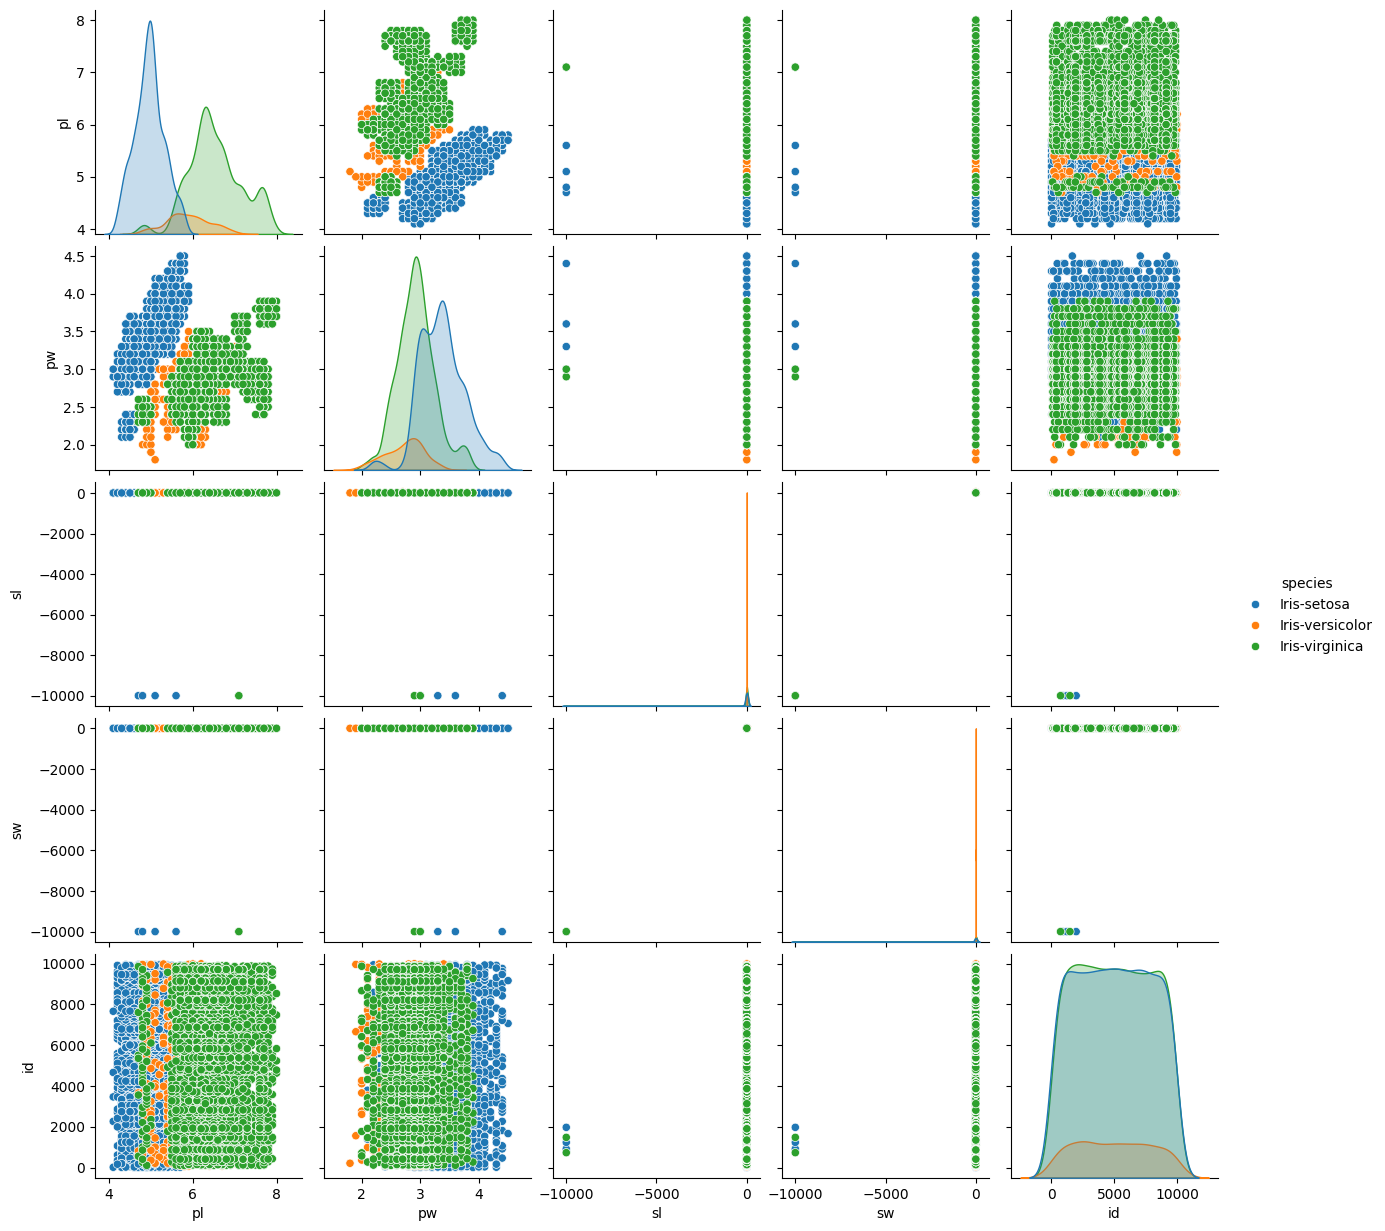

In [ ]:
import seaborn as sns
sns . pairplot (data , hue ="species")

Task 2.1

In [ ]:
print ( data . value_counts ("species"))
data.groupby("species").count()

species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64


,pl,pw,sl,sw,id
species,,,,,
Iris-setosa,3000,3000,3000,3000,3000
Iris-versicolor,500,500,500,500,500
Iris-virginica,3000,3000,3000,3000,3000


Task 3.1

In [ ]:
print((data == -9999).sum())
print((labels == -9999).sum())
print(data.describe())

data = data[data["sl"] != -9999]
data = data[data["sw"] != -9999]
print(data.describe())

pl         0
pw         0
sl         6
sw         6
id         0
species    0
dtype: int64
examiner    0
id          0
species     0
dtype: int64
                pl           pw           sl           sw           id
count  6500.000000  6500.000000  6500.000000  6500.000000  6500.000000
mean      5.758785     3.115462    -5.705508    -8.025246  4972.744462
std       0.917491     0.430596   303.788948   303.712679  2885.438372
min       4.100000     1.800000 -9999.000000 -9999.000000     1.000000
25%       5.000000     2.900000     1.400000     0.300000  2492.750000
50%       5.700000     3.100000     4.300000     1.400000  4957.500000
75%       6.400000     3.400000     5.400000     2.000000  7470.250000
max       8.000000     4.500000    51.000000    23.000000  9992.000000
                pl           pw           sl           sw           id
count  6494.000000  6494.000000  6494.000000  6494.000000  6494.000000
mean      5.758808     3.115229     3.527595     1.205713  4976.244379
st

Task 3.2

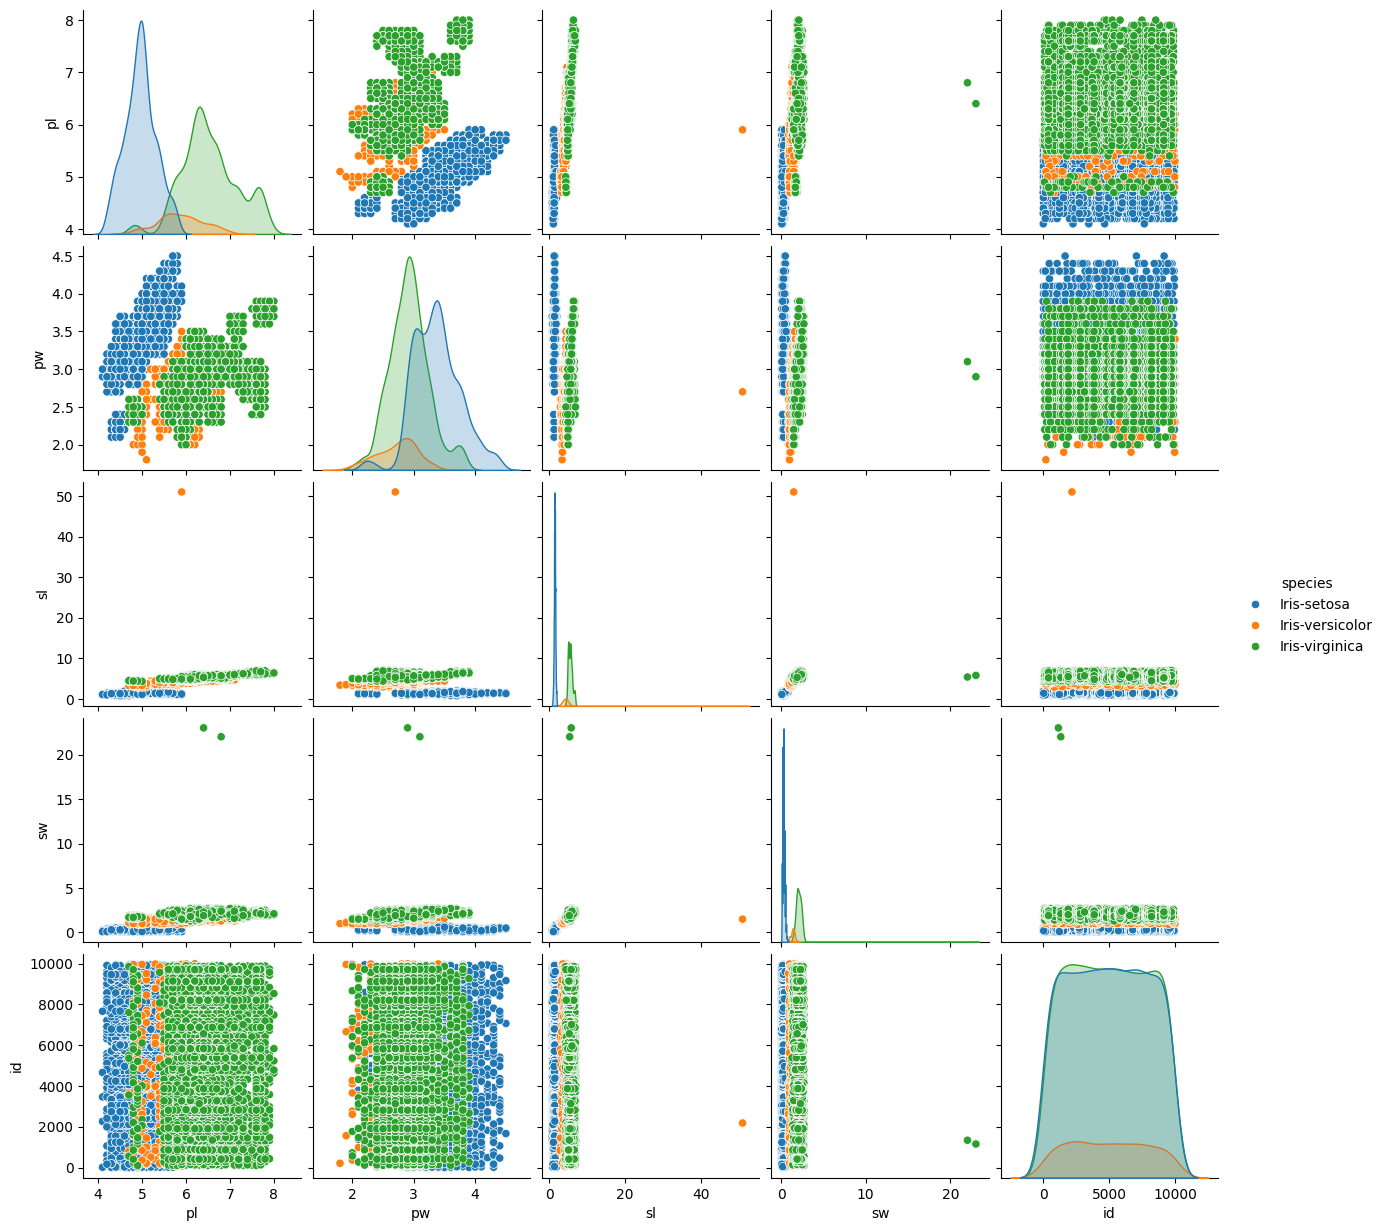

In [ ]:
sns . pairplot (data , hue ="species")

Task 3.2

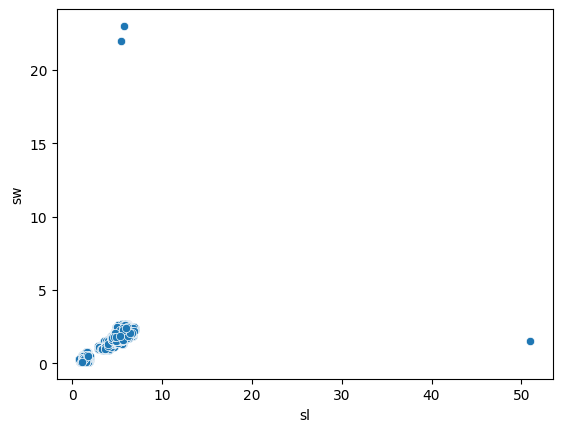

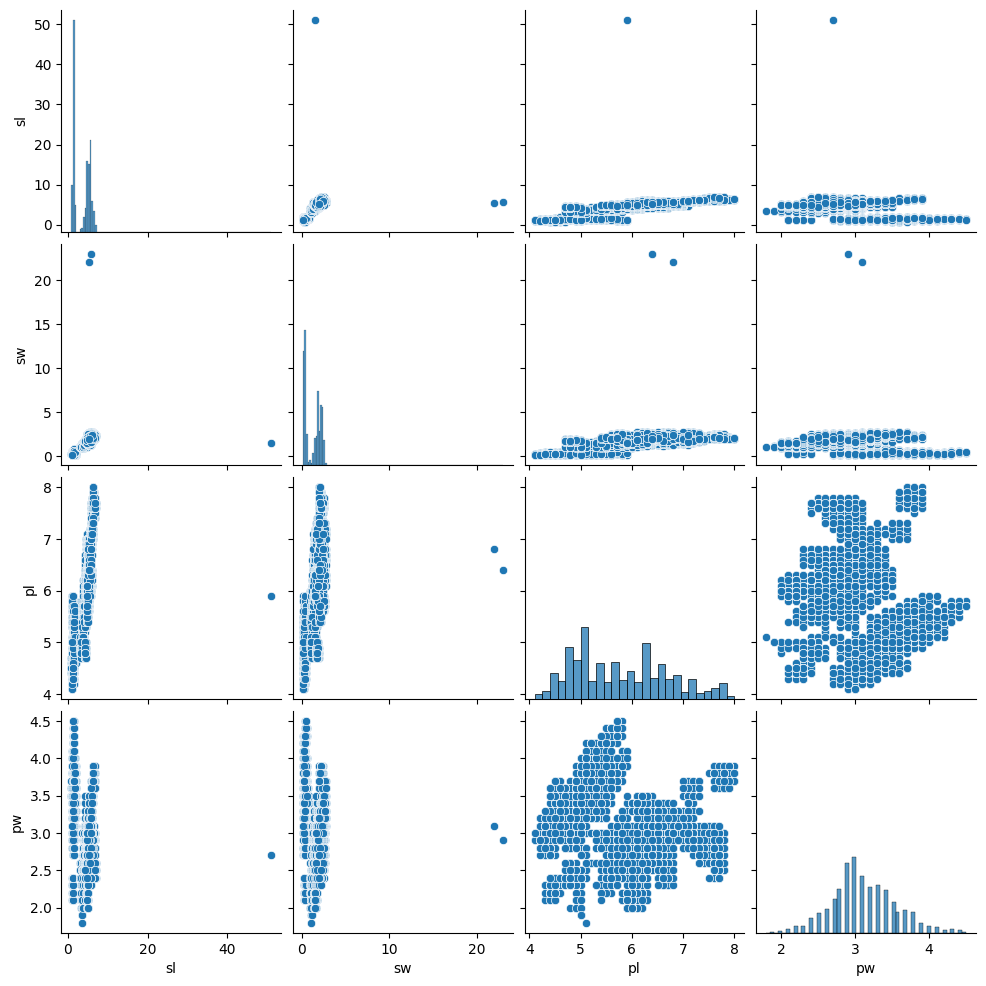

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="sl", y="sw", data=data)
plt.show()

sns.pairplot(data[["sl", "sw", "pl", "pw"]])
plt.show()

In [ ]:
from scipy import stats
import numpy as np

numeric_data = data[["sl", "sw", "pl", "pw"]]

z_scores = np.abs(stats.zscore(numeric_data))

data_no_outliers = data[(z_scores < 3).all(axis=1)]

print("Original shape:", data.shape)
print("After removing outliers:", data_no_outliers.shape)

avg_sl = data_no_outliers["sl"].mean()
std_sl = data_no_outliers["sl"].std()

print("Average sepal length (sl):", avg_sl)
print("Standard deviation of sepal length (sl):", std_sl)



Original shape: (6494, 6)
After removing outliers: (6487, 6)
Average sepal length (sl): 3.5206258671188535
Standard deviation of sepal length (sl): 2.01850521025805


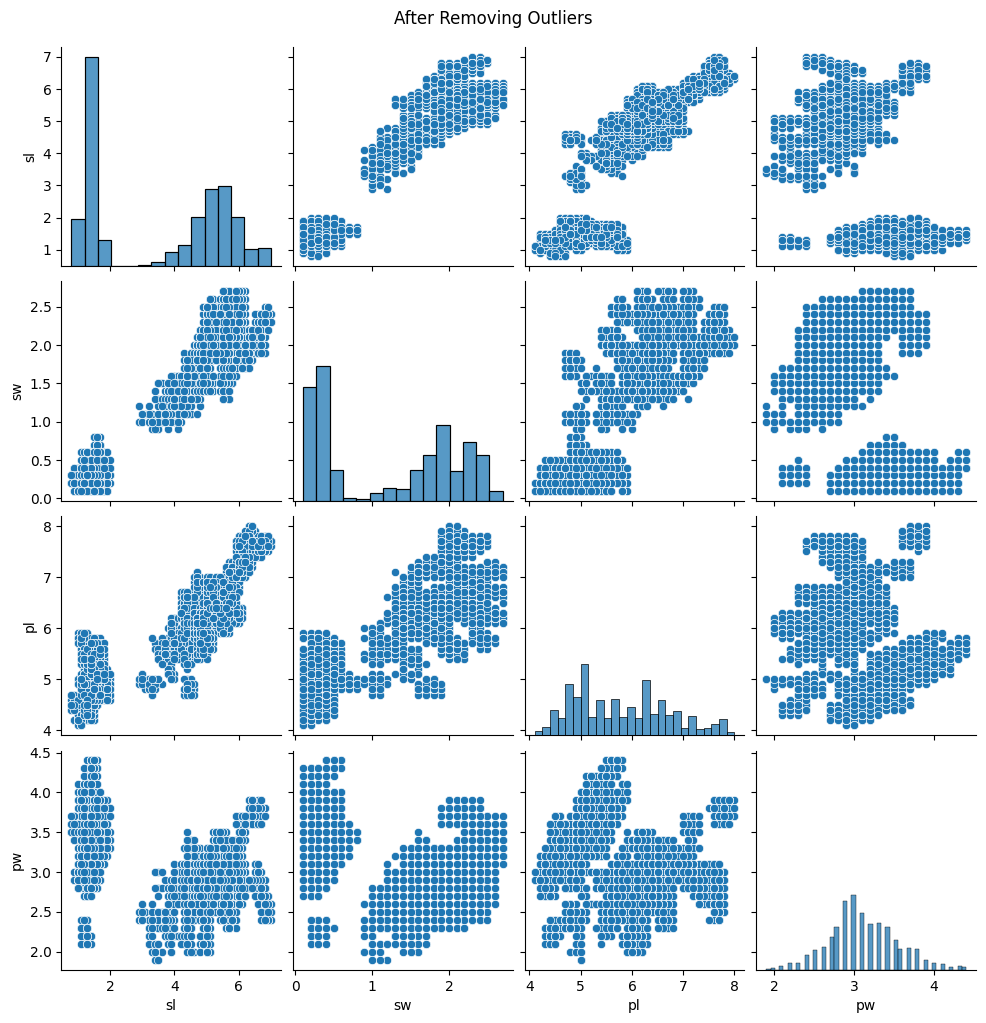

In [ ]:
sns.pairplot(data_no_outliers[["sl", "sw", "pl", "pw"]])
plt.suptitle("After Removing Outliers", y=1.02)
plt.show()

Task 4.1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_cols = ["sl", "sw", "pl", "pw"]
numeric_data = data_no_outliers[numeric_cols]

scaler = MinMaxScaler()

minmax_scaled = scaler.fit_transform(numeric_data)

scaled_df = pd.DataFrame(minmax_scaled, columns=numeric_cols)

print(scaled_df.describe())


                sl           sw           pl           pw
count  6487.000000  6487.000000  6487.000000  6487.000000
mean      0.438811     0.422875     0.425292     0.485957
std       0.325565     0.340273     0.235316     0.171716
min       0.000000     0.000000     0.000000     0.000000
25%       0.096774     0.076923     0.230769     0.400000
50%       0.564516     0.500000     0.410256     0.480000
75%       0.741935     0.730769     0.589744     0.600000
max       1.000000     1.000000     1.000000     1.000000


Task 4.2

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["sl", "sw", "pl", "pw"]
numeric_data = data_no_outliers[numeric_cols]

scaler = StandardScaler()

sd_scaled = scaler.fit_transform(numeric_data)

sd_scaled_df = pd.DataFrame(sd_scaled, columns=numeric_cols)

print(sd_scaled_df.describe())


                 sl            sw            pl            pw
count  6.487000e+03  6.487000e+03  6.487000e+03  6.487000e+03
mean  -2.103040e-16  1.402027e-16 -7.010133e-16  1.156672e-15
std    1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00
min   -1.347946e+00 -1.242847e+00 -1.807462e+00 -2.830223e+00
25%   -1.050673e+00 -1.016767e+00 -8.267094e-01 -5.006130e-01
50%    3.861443e-01  2.266725e-01 -6.390187e-02 -3.469097e-02
75%    9.311440e-01  9.049124e-01  6.989057e-01  6.641920e-01
max    1.723871e+00  1.696192e+00  2.442466e+00  2.993802e+00


Task 4.3

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


data_for_pca = sd_scaled_df

pca = PCA()
principal_components = pca.fit_transform(data_for_pca)

pca_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(data_for_pca.shape[1])])



In [ ]:
loadings = pd.DataFrame(
    pca.components_,
    columns=["sl", "sw", "pl", "pw"],
    index=[f"PC{i+1}" for i in range(len(pca.components_))]
)

print("PC1 definition:")
print(loadings.loc["PC1"])


PC1 definition:
sl    0.572936
sw    0.558982
pl    0.520003
pw   -0.298127
Name: PC1, dtype: float64


In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio per component:", explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to explain at least 95% variance:", n_components_95)

Explained variance ratio per component: [0.7476369  0.21495417 0.03220241 0.00520652]
Cumulative explained variance: [0.7476369  0.96259107 0.99479348 1.        ]
Number of components to explain at least 95% variance: 2


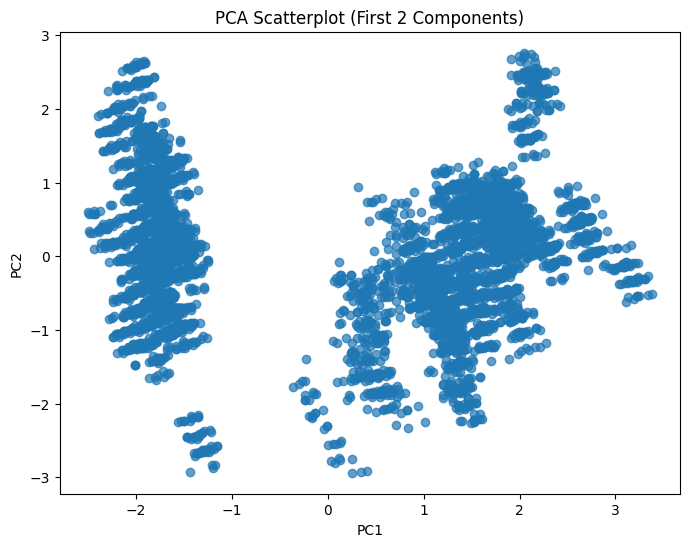

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatterplot (First 2 Components)")
plt.show()

Task 4.4

In [ ]:
import pandas as pd

components_df = pd.DataFrame(
    pca.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=['PC1','PC2','PC3','PC4']
)

attribute_contribution = components_df.abs().mean(axis=0)
print("Contribution of each attribute to the principal components:")
print(attribute_contribution)


Contribution of each attribute to the principal components:
Sepal L    0.391084
Sepal W    0.449172
Petal L    0.473324
Petal W    0.389931
dtype: float64


Task 4.5

In [ ]:
X = data[['sl', 'sw', 'pl', 'pw']]

scaler = MinMaxScaler(feature_range=(0, 100))
X_rescaled = X.copy()
X_rescaled[['pl']] = scaler.fit_transform(X[['pl']])

pca_rescaled = PCA()
pca_rescaled.fit(X_rescaled)

components_df_rescaled = pd.DataFrame(
    pca_rescaled.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=['PC1', 'PC2', 'PC3', 'PC4']
)

attribute_contribution_rescaled = components_df_rescaled.abs().mean(axis=0)

print("Contribution of each attribute to the principal components (with Petal L rescaled):")
print(attribute_contribution_rescaled)

explained_variance = pca_rescaled.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

threshold = 0.95
n_components = (cumulative_variance < threshold).sum() + 1

print("\nExplained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)
print(f"Number of components selected (>= {threshold*100:.0f}% variance): {n_components}")



Contribution of each attribute to the principal components (with Petal L rescaled):
Sepal L    0.391420
Sepal W    0.341170
Petal L    0.273749
Petal W    0.311810
dtype: float64

Explained variance ratio: [9.96947043e-01 2.47831063e-03 3.70228559e-04 2.04417557e-04]
Cumulative variance ratio: [0.99694704 0.99942535 0.99979558 1.        ]
Number of components selected (>= 95% variance): 1


Task 4.6

In [ ]:
X_outlier = data[['sl', 'sw', 'pl', 'pw']].copy()

X_outlier.loc[0, 'pl'] = 5000

pca_outlier = PCA()
pca_outlier.fit(X_outlier)

components_df_outlier = pd.DataFrame(
    pca_outlier.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=['PC1','PC2','PC3','PC4']
)

attribute_contribution_outlier = components_df_outlier.abs().mean(axis=0)

print("Contribution of each attribute to the principal components (with outlier added):")
print(attribute_contribution_outlier)

explained_variance = pca_outlier.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

threshold = 0.95
n_components = (cumulative_variance < threshold).sum() + 1

print("\nExplained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)
print(f"Number of components selected (>= {threshold*100:.0f}% variance): {n_components}")


Contribution of each attribute to the principal components (with outlier added):
Sepal L    0.352785
Sepal W    0.341620
Petal L    0.250021
Petal W    0.295484
dtype: float64

Explained variance ratio: [9.98563202e-01 1.34471058e-03 5.39268273e-05 3.81602571e-05]
Cumulative variance ratio: [0.9985632  0.99990791 0.99996184 1.        ]
Number of components selected (>= 95% variance): 1


Task 5.1

In [ ]:
sample = data_no_outliers.sample(n=150)
print(sample['species'].value_counts())
print(sample.head())
print("Shape of the sampled dataset:", sample.shape)

sample = data_no_outliers.sample(n=150, random_state=42)
print(sample['species'].value_counts())
print(sample.head())
print("Shape of the sampled dataset:", sample.shape)


species
Iris-virginica     73
Iris-setosa        70
Iris-versicolor     7
Name: count, dtype: int64
       pl   pw   sl   sw    id         species
5293  4.9  3.4  1.5  0.2  8108     Iris-setosa
3609  7.7  2.6  6.9  2.5  5519  Iris-virginica
85    6.2  3.4  5.5  2.4   137  Iris-virginica
4287  5.9  2.2  4.8  1.5  6570  Iris-virginica
268   5.7  2.9  4.7  2.0   422  Iris-virginica
Shape of the sampled dataset: (150, 6)
species
Iris-virginica     65
Iris-setosa        64
Iris-versicolor    21
Name: count, dtype: int64
       pl   pw   sl   sw    id          species
1231  5.5  2.4  3.8  1.0  1870  Iris-versicolor
1778  6.1  3.3  5.3  2.4  2699   Iris-virginica
5712  5.7  2.7  4.0  1.3  8783  Iris-versicolor
2192  5.1  3.2  1.5  0.5  3324      Iris-setosa
270   6.2  2.6  4.8  1.8   424   Iris-virginica
Shape of the sampled dataset: (150, 6)


Task 5.2

In [ ]:
bootstrap_sample = data_no_outliers.sample(n=150, replace=True)
print(bootstrap_sample['species'].value_counts())
print(bootstrap_sample.head())
print("Shape of bootstrap sample:", bootstrap_sample.shape)

bootstrap_sample = data_no_outliers.sample(n=150, replace=True, random_state=42)
print(bootstrap_sample['species'].value_counts())
print(bootstrap_sample.head())
print("Shape of bootstrap sample:", bootstrap_sample.shape)


species
Iris-setosa        71
Iris-virginica     67
Iris-versicolor    12
Name: count, dtype: int64
       pl   pw   sl   sw    id         species
590   6.6  3.2  5.6  2.6   895  Iris-virginica
2304  4.8  3.0  1.6  0.2  3485     Iris-setosa
3081  5.0  3.2  1.6  0.3  4690     Iris-setosa
1970  6.7  2.9  5.3  2.3  2996  Iris-virginica
1317  5.4  3.5  1.3  0.3  1987     Iris-setosa
Shape of bootstrap sample: (150, 6)
species
Iris-setosa        69
Iris-virginica     69
Iris-versicolor    12
Name: count, dtype: int64
       pl   pw   sl   sw    id         species
3159  5.6  3.8  1.7  0.5  4819     Iris-setosa
2532  6.2  2.7  4.8  1.9  3877  Iris-virginica
1939  6.5  2.6  5.8  1.8  2959  Iris-virginica
2336  7.7  3.8  6.6  2.2  3568  Iris-virginica
4862  7.2  2.9  6.1  1.9  7458  Iris-virginica
Shape of bootstrap sample: (150, 6)


Task 5.3

In [ ]:
stratified_sample = data.groupby('species', group_keys=False).apply(
    lambda x: x.sample(frac=0.5)
)

print(stratified_sample['species'].value_counts())
print("Shape of stratified sample:", stratified_sample.shape)
print(stratified_sample.head())



species
Iris-virginica     1499
Iris-setosa        1498
Iris-versicolor     250
Name: count, dtype: int64
Shape of stratified sample: (3247, 6)
       pl   pw   sl   sw    id      species
1310  4.6  3.2  1.7  0.2  1980  Iris-setosa
834   4.5  3.2  1.3  0.3  1248  Iris-setosa
3189  5.0  3.2  1.4  0.2  4850  Iris-setosa
984   5.3  4.0  1.7  0.4  1506  Iris-setosa
827   4.9  3.5  1.1  0.3  1241  Iris-setosa


/tmp/ipython-input-124906220.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('species', group_keys=False).apply(


Task 5.4

In [ ]:
stratified_sample = data.groupby('species', group_keys=False).apply(
    lambda x: x.sample(50)
)

print(stratified_sample['species'].value_counts())
print("Shape of stratified sample:", stratified_sample.shape)
print(stratified_sample.head())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Shape of stratified sample: (150, 6)
       pl   pw   sl   sw    id      species
39    4.4  3.0  1.3  0.3    43  Iris-setosa
2592  4.4  3.0  1.2  0.3  3939  Iris-setosa
4411  5.0  3.0  1.2  0.3  6752  Iris-setosa
2788  4.4  2.9  1.4  0.2  4239  Iris-setosa
304   5.3  3.6  1.3  0.4   461  Iris-setosa


/tmp/ipython-input-1538482965.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby('species', group_keys=False).apply(
